In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(256, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))

#model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                        factor=0.2, patience=5,
                                                        min_lr=0.001)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/10
469/469 [==============================] - 14s 30ms/step - loss: 2.2852 - accuracy: 0.1807 - val_loss: 2.2578 - val_accuracy: 0.4577
Epoch 2/10
469/469 [==============================] - 14s 30ms/step - loss: 2.2298 - accuracy: 0.3764 - val_loss: 2.1739 - val_accuracy: 0.6415
Epoch 3/10
469/469 [==============================] - 14s 30ms/step - loss: 2.0999 - accuracy: 0.5305 - val_loss: 1.9439 - val_accuracy: 0.7217
Epoch 4/10
469/469 [==============================] - 14s 30ms/step - loss: 1.7218 - accuracy: 0.6184 - val_loss: 1.3126 - val_accuracy: 0.7635
Epoch 5/10
469/469 [==============================] - 14s 31ms/step - loss: 1.1270 - accuracy: 0.6984 - val_loss: 0.7654 - val_accuracy: 0.8204
Epoch 6/10
469/469 [==============================] - 14s 31ms/step - loss: 0.8161 - accuracy: 0.7518 - val_loss: 0.5715 - val_accuracy: 0.8473
Epoch 7/10
469/469 [==============================] - 14s 31ms/

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
import pandas as pd
import numpy as np

data_test = np.array(pd.read_csv('/content/drive/My Drive/Colab Notebooks/experiements/digit recognize/test.csv'))

In [ ]:
if K.image_data_format() == 'channels_first':
    data_test = data_test.reshape(data_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    data_test= data_test.reshape(data_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
classes = model.predict(data_test)

In [ ]:
classes1 = []
for i in range(classes.shape[0]):
  a = [j for j in range(len(list(classes[i]))) if classes[i][j] > 0.5]
  a1 = a[0]
  classes1.append(a1)

classes1 = np.array(classes1)

In [ ]:
classes1[0:100]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1,
       8, 5, 7, 4, 2, 7, 7, 7, 7, 5, 4, 2, 6, 2, 5, 5, 8, 6, 7, 7, 4, 9,
       8, 7, 8, 8, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 4, 0, 4, 1, 7, 0, 0, 0,
       1, 9, 0, 1, 6, 5, 8, 8, 2, 5, 3, 9, 2, 3, 5, 9, 1, 0, 9, 2, 4, 3,
       6, 7, 2, 0, 6, 6, 8, 4, 3, 9, 7, 4])

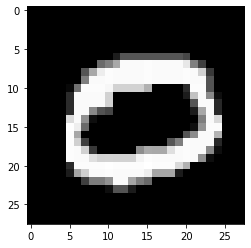

In [ ]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(data_test[1].reshape((28, 28)), cmap="gray")

In [ ]:
t = pd.DataFrame(classes1)
t = t.set_index(np.array([i for i in range(1,28001)]))
t.rename()

,0
1,2
2,0
3,9
4,9
5,3
...,...
27996,9
27997,7
27998,3
27999,9


In [ ]:
submission = pd.DataFrame({'Label': t})
submission.to_csv('submission.csv', index=False)

ValueError: ignored

In [ ]:
t.to_csv('/content/drive/My Drive/Colab Notebooks/experiements/digit recognize/submission.csv')